In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
outcomes_train = pd.read_csv('outcomes_training.csv')

In [3]:
outcomes_perHackID = pd.read_csv('perHackID.csv')

In [4]:
outcomes_train.describe()


,HackID
count,2.812300e+04
mean,2.550245e+07
std,1.564099e+07
min,5.180000e+02
25%,1.226628e+07
50%,2.749411e+07
75%,4.132965e+07
max,5.074435e+07


In [27]:
health_consumer = pd.read_excel('healthdata/Consumer_data.xlsx')

In [28]:
bh_health_claims= pd.read_excel('healthdata/BH_claims_Hackathon.xlsx')

In [5]:
print(outcomes_perHackID.columns.values)

['HackID' 'HackCounty' 'Gender' 'Race' 'Ethnicity' 'A00-B99' 'C00-D49'
 'D50-D89' 'E00-E89' 'F01-F99' 'G00-G99' 'H00-H59' 'H60-H95' 'I00-I99'
 'J00-J99' 'K00-K95' 'L00-L99' 'M00-M99' 'N00-N99' 'O00-O9A' 'P00-P96'
 'Q00-Q99' 'R00-R99' 'S00-T88' 'Z00-Z99']


In [29]:
consumer_bh_health_claims =pd.merge(health_consumer, bh_health_claims, left_on='HackID', right_on='HackID')


In [6]:
outcomes_training= pd.merge(outcomes_train, outcomes_perHackID, left_on='HackID', right_on='HackID')

# Patents Race distribution


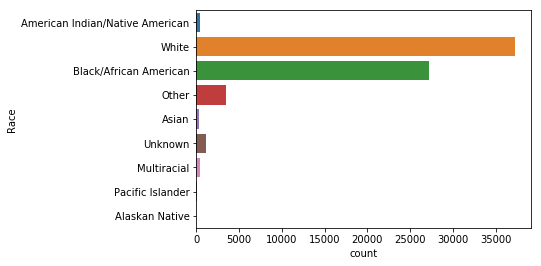

In [32]:

sns.countplot(y='Race', data=health_consumer)

# Patent Gendar Distrubution

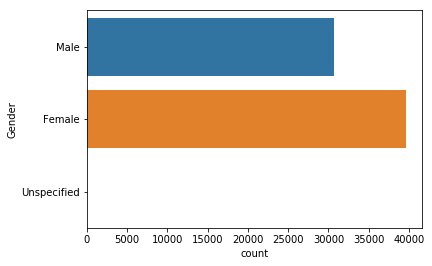

In [31]:

sns.countplot(y='Gender', data=health_consumer)

# Patent  Distrubution  based on ServiceSummary

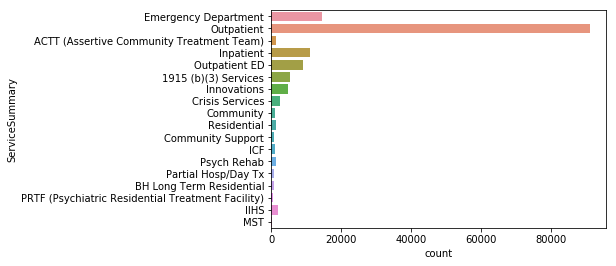

In [30]:

sns.countplot(y='ServiceSummary', data=bh_health_claims)

In [7]:
outcomes_training.head()

,HackID,crisis,HackCounty,Gender,Race,Ethnicity,A00-B99,C00-D49,D50-D89,E00-E89,...,K00-K95,L00-L99,M00-M99,N00-N99,O00-O9A,P00-P96,Q00-Q99,R00-R99,S00-T88,Z00-Z99
0,14902416,False,871,Male,Black/African American,N= Not Hispanic Origin,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,833721,False,134,Female,Black/African American,N= Not Hispanic Origin,0,0,0,0,...,0,0,6,0,0,0,0,0,18,17
2,33584419,False,6834,Female,White,N= Not Hispanic Origin,0,0,0,0,...,0,0,3,0,0,0,0,98,0,2
3,44997883,False,6968,Male,Black/African American,U= Unknown,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,30329566,False,6834,Male,Black/African American,U= Unknown,1,0,0,0,...,0,0,5,0,0,0,0,18,3,9


In [8]:
outcomes_training.head(50)

,HackID,crisis,HackCounty,Gender,Race,Ethnicity,A00-B99,C00-D49,D50-D89,E00-E89,...,K00-K95,L00-L99,M00-M99,N00-N99,O00-O9A,P00-P96,Q00-Q99,R00-R99,S00-T88,Z00-Z99
0,14902416,False,871,Male,Black/African American,N= Not Hispanic Origin,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,833721,False,134,Female,Black/African American,N= Not Hispanic Origin,0,0,0,0,...,0,0,6,0,0,0,0,0,18,17
2,33584419,False,6834,Female,White,N= Not Hispanic Origin,0,0,0,0,...,0,0,3,0,0,0,0,98,0,2
3,44997883,False,6968,Male,Black/African American,U= Unknown,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,30329566,False,6834,Male,Black/African American,U= Unknown,1,0,0,0,...,0,0,5,0,0,0,0,18,3,9
5,37131868,False,67,Male,Black/African American,N= Not Hispanic Origin,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
6,17419415,False,670,Male,White,N= Not Hispanic Origin,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15895311,True,871,Female,White,N= Not Hispanic Origin,0,0,0,0,...,0,3,13,0,0,0,0,1,16,3
8,45094120,False,6968,Female,White,N= Not Hispanic Origin,0,0,0,0,...,0,7,0,0,0,0,0,1,0,7
9,16370909,False,804,Female,White,N= Not Hispanic Origin,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4


In [9]:
outcomes_testing = pd.read_csv('outcomes_testing1.csv')

In [10]:
outcomes_testing.head()

,HackID,crisis
0,9345793,False
1,22046598,False
2,15104510,True
3,43754350,False
4,1187071,False


In [11]:
outcomes_testing= pd.merge(outcomes_testing, outcomes_perHackID, left_on='HackID', right_on='HackID')

In [12]:
outcomes_testing.head(0)

,HackID,crisis,HackCounty,Gender,Race,Ethnicity,A00-B99,C00-D49,D50-D89,E00-E89,...,K00-K95,L00-L99,M00-M99,N00-N99,O00-O9A,P00-P96,Q00-Q99,R00-R99,S00-T88,Z00-Z99


In [13]:
outcomes_testing.head()


,HackID,crisis,HackCounty,Gender,Race,Ethnicity,A00-B99,C00-D49,D50-D89,E00-E89,...,K00-K95,L00-L99,M00-M99,N00-N99,O00-O9A,P00-P96,Q00-Q99,R00-R99,S00-T88,Z00-Z99
0,9345793,False,335,Female,White,N= Not Hispanic Origin,5,0,0,17,...,0,0,26,0,0,0,0,38,2,3
1,22046598,False,268,Male,Other,N= Not Hispanic Origin,0,0,0,0,...,0,0,0,0,0,0,0,2,0,12
2,15104510,True,871,Female,White,N= Not Hispanic Origin,0,45,0,0,...,2,0,0,0,0,0,0,112,0,0
3,43754350,False,6968,Female,Multiracial,"M= Hispanic, Mexican American",0,0,0,5,...,0,0,13,8,0,0,0,13,0,0
4,1187071,False,134,Male,Black/African American,N= Not Hispanic Origin,0,0,0,5,...,15,0,0,0,0,0,1,0,0,2


In [15]:
X_train1 = outcomes_training.drop("crisis", axis=1)
X_train = X_train1.drop("HackID", axis=1)
Y_train = outcomes_training["crisis"]
X_test1  = outcomes_testing.drop("crisis", axis=1)
X_test  = X_test1.drop("HackID", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((28123, 24), (28123,), (21093, 24))

In [16]:
le = preprocessing.LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.010000000000005

In [18]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

92.560000000000002

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.379999999999995

In [20]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.519999999999996

In [21]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


70.439999999999998

In [22]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

77.689999999999998

In [23]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


81.799999999999997

In [ ]:
X_train.head(28125).shape

In [24]:
# Decision Tree
X_train.head(28123)
from sklearn import tree
decision_tree = DecisionTreeClassifier()
modelfit =decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


99.310000000000002

In [25]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
model =random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


99.310000000000002

In [ ]:
tree.export_graphviz(decision_tree,
                feature_names=X_train.columns,
                filled=True,
                rounded=True)

In [ ]:

dot -Tpdf tree.dot -o crisis_classifier.pdf

# Predicting Crisis

In [26]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.31
8,Decision Tree,99.31
0,Support Vector Machines,92.56
1,KNN,86.38
2,Logistic Regression,82.01
6,Stochastic Gradient Decent,81.80
7,Linear SVC,77.69
4,Naive Bayes,76.52
5,Perceptron,70.44
